In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_needed = ["Order Date", "Purchase Price Per Unit", "Quantity", "Category", "Survey ResponseID", "Shipping Address State", "ppt", "tmin", "tmax", "tavg"]

transactions_temp = pd.read_csv("./Data/data_combined.csv", usecols=data_needed)
transactions_temp["Order Date"] = pd.to_datetime(transactions_temp["Order Date"]) # Formating Order date back to Datetime dtype, in read_csv you cant set column to datetime so need to do manually

In [80]:

# Granger causality test

#### Calculating total amount of each transactions (Quantity * Unit price) 

In [3]:
transactions_temp["Revenue"] = transactions_temp["Purchase Price Per Unit"] * transactions_temp["Quantity"]

#### Creating subset for fashion, or Grocers

In [5]:
Fashion = [
    "ACCESSORY", "ADULT_COSTUME", "APPAREL", "APPAREL_BELT", "APPAREL_GLOVES",
    "APPAREL_HEAD_NECK_COVERING", "APPAREL_PIN", "APPENDAGE_WARMER", "APRON",
    "ARM_SLEEVE", "Apparel", "BABY_JUMPER_WALKER", "BELTS", "BLAZER",
    "BLUE_LIGHT_BLOCKING_EYEGLASSES", "BODYSTOCKING", "BOOT", "BRA", "BRACELET",
    "BRA_UNDERWEAR_SET", "CHOLI", "COAT", "COORDINATED_OUTFIT", "CORRECTIVE_EYEGLASSES",
    "CORSET", "DRESS", "DUPATTA", "EARMUFF", "EARRING", "ETHNIC_WEAR",
    "FASHIONEARRING", "FASHIONNECKLACEBRACELETANKLET", "FASHIONOTHER", "FASHIONRING",
    "FASHION_JEWELRY", "FINEEARRING", "FINENECKLACEBRACELETANKLET", "FINERING",
    "FOOTWEAR", "GUILD_APPAREL", "GUILD_JEWELRY", "GUILD_SHOES", "HAT", "HOSIERY",
    "JEWELRY", "JEWELRY_SET", "KIMONO", "KURTA", "LEG_SLEEVE", "LEOTARD",
    "MOISTURIZING_SOCK_GLOVE", "NECKLACE", "NECKTIE", "NIGHTGOWN_NIGHTSHIRT",
    "ORCA_SHIRT", "OUTERWEAR", "OVERALLS", "PAJAMAS", "PANTS", "PIERCING_JEWELRY",
    "ROBE", "SANDAL", "SAREE", "SHIRT", "SHOES", "SHORTS", "SKIRT", "SLEEPWEAR",
    "SLIPPER", "SNOWSHOE", "SNOWSUIT", "SNOW_PANT", "SOCK", "SOCKSHOSIERY", "SUIT",
    "SUNGLASSES", "SUSPENDER", "SWEATER", "SWEATSHIRT", "SWIMWEAR", "SWIM_CAP",
    "TIGHTS", "TRACK_SUIT", "UNDERPANTS", "UNDERWEAR", "UNDERGARMENT_SLIP",
    "UNDERGARMENT_THIGH_SLIMMER", "UNION_SUIT", "VEST", "WATCH", "WATCHES", "WATCH_BAND"
]


Groceries = [
   "ALCOHOLIC_BEVERAGE", "BABY_FOOD", "BABY_FORMULA", "BAKING_CHOCOLATE", "BEER",
   "BEVERAGE", "BREAD", "BREAKFAST_CEREAL", "CAKE", "CANDY", "CEREAL",
   "CHOCOLATE_CANDY", "COFFEE", "CONDIMENT", "COOKIE", "CRACKER", "CULINARY_SALT",
   "DAIRY_BASED_BUTTER", "DAIRY_BASED_CHEESE", "DAIRY_BASED_CREAM",
   "DAIRY_BASED_DRINK", "DAIRY_BASED_ICE_CREAM", "DAIRY_BASED_PUDDING",
   "DAIRY_BASED_YOGURT", "DONUT", "DRINK_FLAVORED", "EDIBLE_OIL_VEGETABLE",
   "FLOUR", "FRUIT", "FRUIT_SNACK", "FUDGE", "GOURMET_FOOD", "GROCERY", "Grocery",
   "HEALTH_FOOD", "HONEY", "JERKY", "JUICE_AND_JUICE_DRINK", "LEGUME",
   "MEAL_REPLACEMENT_BEVERAGE", "MEAT_ALTERNATIVE", "MILK_SUBSTITUTE",
   "NON_DAIRY_CHEESE", "NON_DAIRY_CREAM", "NON_DAIRY_ICE_CREAM",
   "NON_DAIRY_PUDDING", "NON_DAIRY_YOGURT", "NOODLE", "NUTS", "NUT_AND_SEED",
   "NUT_BUTTER", "OLIVE", "PACKAGED_SOUP_AND_STEW", "PASTRY", "POPCORN",
   "PRETZEL", "PROTEIN_DRINK", "PROTEIN_SUPPLEMENT_POWDER", "PUFFED_SNACK",
   "RICE_MIX", "RICE_WINE", "SALAD_DRESSING", "SEAFOOD", "SEASONING",
   "SNACK_CHIP_AND_CRISP", "SNACK_FOOD", "SNACK_FOOD_BAR", "SNACK_MIX",
   "SPORTS_DRINK", "SUGAR", "SUGAR_CANDY", "SUGAR_SUBSTITUTE", "SYRUP", "TEA",
   "TOFU", "VEGETABLE", "VEGETARIAN_EGG_SUBSTITUTE", "WATER"
]

In [6]:
mask_fashion = transactions_temp["Category"].isin(Fashion)
Fashion_transactions = transactions_temp[mask_fashion]


mask_groceries = transactions_temp["Category"].isin(Groceries)
Grocerie_transactions = transactions_temp[mask_groceries]

In [84]:
#print(Fashion_transactions["Shipping Address State"].count()) # One Category seems to be missing (maybe typo), or upper and lower letters
#print(Grocerie_transactions["Category"].nunique())

In [7]:
#Fashion_transactions.groupby("Shipping Address State").agg({"Shipping Address State": "count"}).sort_values("Shipping Address State", ascending= False)

print(Fashion_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))


print(Grocerie_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))

Shipping Address State
CA    15067
TX    11823
FL    10646
NY     9974
PA     8993
Name: Shipping Address State, dtype: int64
Shipping Address State
CA    19988
TX    13967
NY    13351
PA    11386
FL     9183
Name: Shipping Address State, dtype: int64


#### Lagging line plot for Fashion and groceries 

#### Subsetting for only CA 

In [ ]:
## Fashion
CA_filter = Fashion_transactions["Shipping Address State"]== "CA"

CA_fashion = Fashion_transactions[CA_filter]


CA_fashion  = CA_fashion[(CA_fashion['Order Date'] > '2018-01-01') & (CA_fashion['Order Date'] < '2018-02-01')]
CA_fashion = CA_fashion.sort_values("Order Date", ascending=True)

## Groceries
Groceries_filter = Grocerie_transactions["Shipping Address State"]== "CA"

CA_Groceries = Grocerie_transactions[Groceries_filter]

CA_Groceries  = CA_Groceries[(CA_Groceries['Order Date'] >= '2018-1-1') & (CA_Groceries['Order Date'] < '2019-01-01')] 

CA_Groceries = CA_Groceries.sort_values("Order Date", ascending=True)


### Plotting

Create plot showing Date on x axis
Using double y axis, one for temp and one for revenue
https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/

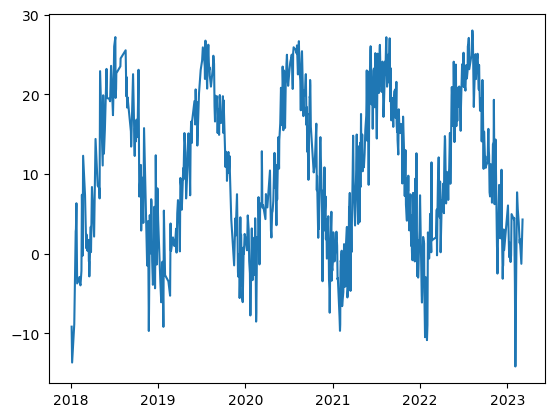

In [153]:
fig, ax = plt.subplots()
ax.plot(CA_fashion["Order Date"], CA_fashion["tavg"])
plt.show()

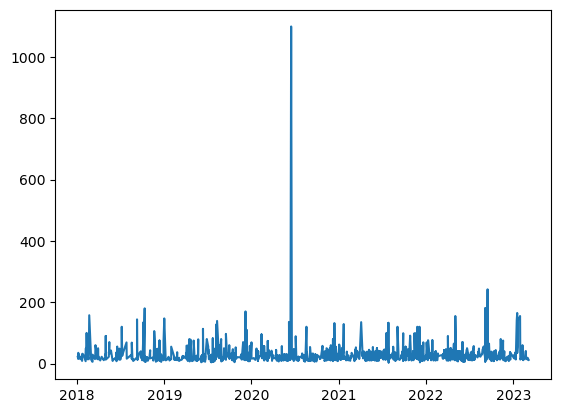

In [154]:
fig, ax = plt.subplots()
ax.plot(CA_fashion["Order Date"], CA_fashion["Revenue"])
plt.show()

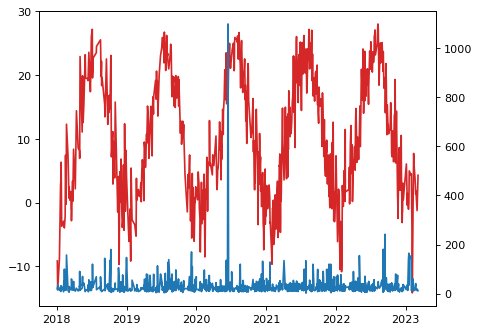

In [155]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1, dpi= 80)
ax1.plot(CA_fashion["Order Date"], CA_fashion["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_fashion["Order Date"], CA_fashion["Revenue"], color='tab:blue')

#### Groceries

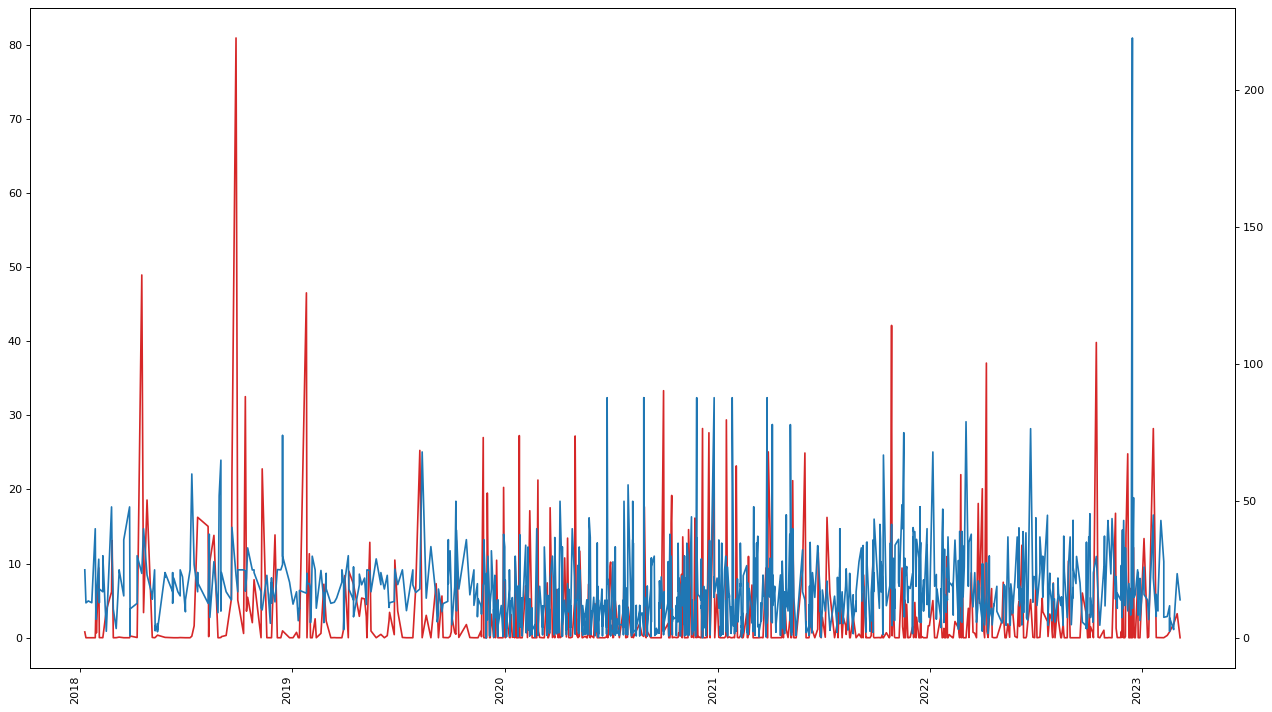

In [156]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(CA_Groceries["Order Date"], CA_Groceries["ppt"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_Groceries["Order Date"], CA_Groceries["Revenue"], color='tab:blue')

# Formating
# ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

plt.tight_layout()


### Cal Total revenue on each day and combine it

In [ ]:
# Tring different grouping 
#CA_Groceries_grouped = CA_Groceries.groupby("Order Date")["Revenue"].sum().plot()

In [ ]:
#CA_Groceries_Daily_Rev = CA_Groceries[["Order Date", "tavg"]]

#CA_Groceries_Daily_Rev = CA_Groceries_Daily_Rev.merge(CA_Groceries_grouped, on="Order Date")

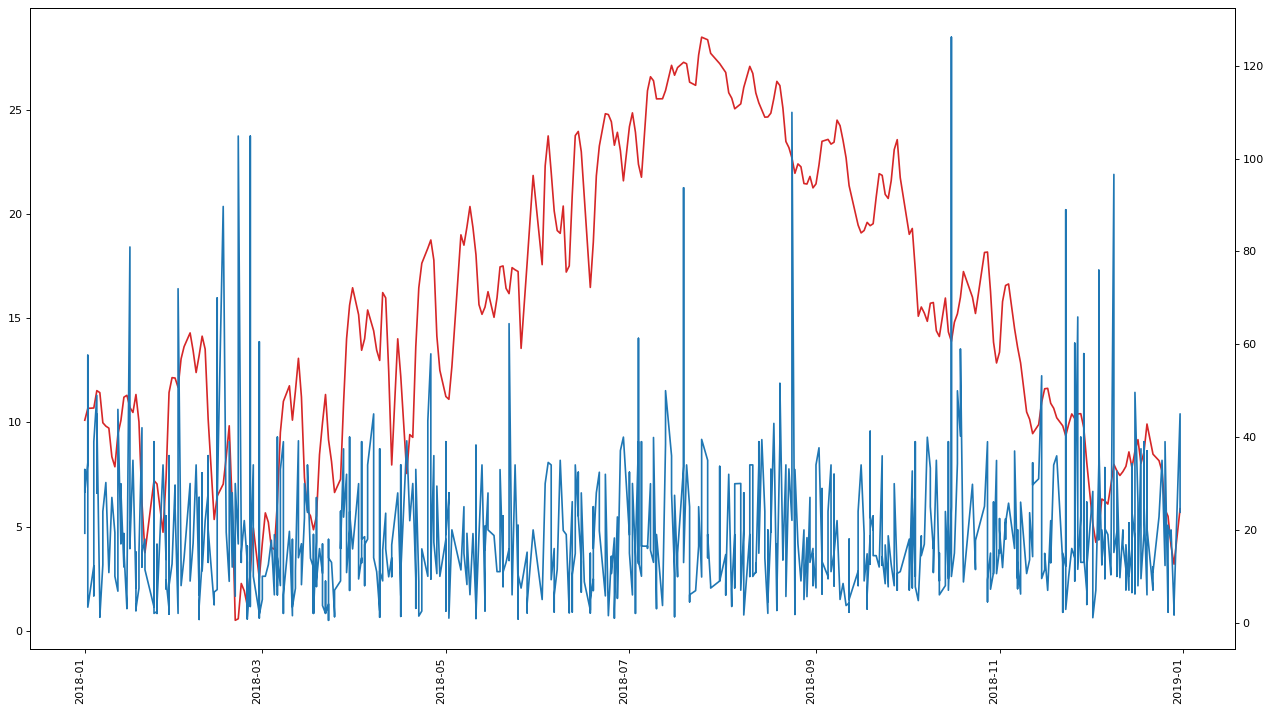

In [ ]:

# Plot Line1 (Left Y Axis)
#fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
#ax1.plot(CA_Groceries_Daily_Rev["Order Date"], CA_Groceries_Daily_Rev["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(CA_Groceries_Daily_Rev["Order Date"], CA_Groceries["Revenue"], color='tab:blue')

# Formating
# ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

#plt.tight_layout()

### Calc SMA for revenue

In [31]:
import numpy as np

In [57]:
CA_Groceries["SMA7_Rev"] = CA_Groceries["Revenue"].rolling(7).mean().round(3)
CA_Groceries["SMA14_Rev"] = CA_Groceries["Revenue"].rolling(14).mean().round(3)
CA_Groceries["SMA30_Rev"] = CA_Groceries["Revenue"].rolling(30).mean().round(3)

Using SMA 7 would mean that the first 7 values of revenue are empty is this enought to get a delay against temperature to detect the predicitability of themperature on Revenue? 

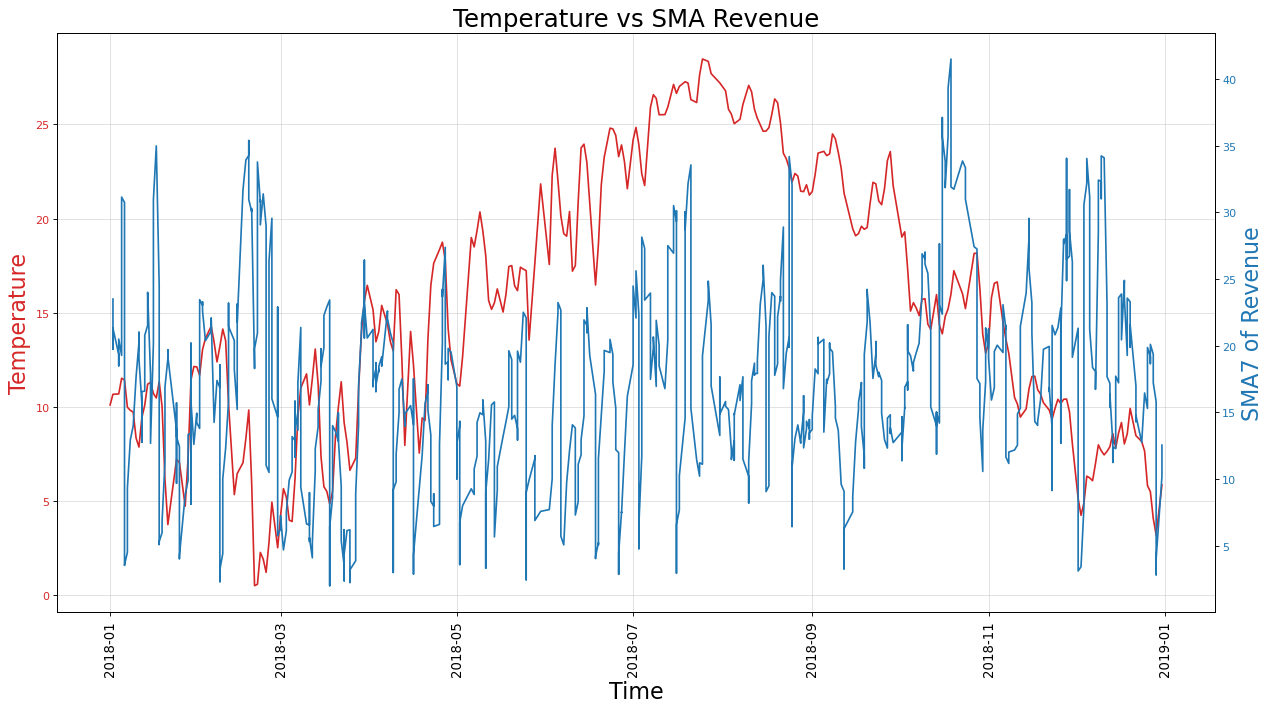

In [59]:
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(CA_Groceries["Order Date"], CA_Groceries["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_Groceries["Order Date"], CA_Groceries["SMA7_Rev"], color='tab:blue')
#ax2.plot(CA_Groceries["Order Date"], CA_Groceries["SMA30_Rev"], color='tab:green')

# Formating
#ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

plt.tight_layout()


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.set_ylabel('Temperature', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("SMA7 of Revenue", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Temperature vs SMA Revenue", fontsize=22)
fig.tight_layout()
plt.show()

## Granger Causality Test

In [48]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [60]:
maxlag = 12
test   = 'ssr_chi2test'

In [50]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [69]:
df_granger_test = CA_Groceries[["Order Date", "SMA7_Rev", "tavg"]]
df_granger_test = df_granger_test.set_index("Order Date")
df_granger_test = df_granger_test.iloc[6:, :]

In [73]:
grangers_causation_matrix(df_granger_test, variables = df_granger_test.columns)  

,SMA7_Rev_x,tavg_x
SMA7_Rev_y,1.0000,0.6413
tavg_y,0.0269,1.0000


For the 2018 temperature causes a significant impact on SMA7 of Revenue

# Granger Causality test for whole data (Fashion and Groceries)

We test if there is a significant correlation in all use states for average Temperature and Revenue of the Category

In [ ]:
## Fashion
Fashion_transactions
#Fashion_transactions["SMA7_Rev"] = Fashion_transactions["Revenue"].rolling(7).mean().round(3)

## Groceries
Grocerie_transactions


In [141]:
# Function that takes: df, variables, state column
# In function create subset for state and perform test

def Granger_Causality_test_per_state(df, states): 
    results = pd.DataFrame(columns=['State', 'SMA7_Tavg'])

    maxlag = 12
    test   = 'ssr_chi2test'

    def grangers_causation_matrix(data, variables, maxlag= 12, test='ssr_chi2test', verbose=False):    
                df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
                for c in df.columns:
                    for r in df.index:
                        test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
                        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
                        min_p_value = np.min(p_values)
                        df.loc[r, c] = min_p_value
                df.columns = [var + '_x' for var in variables]
                df.index = [var + '_y' for var in variables]
                return df

    
    
    for state in states:
        try:
            state_filter = df["Shipping Address State"] == state # Create subset for only one state
            df_one_state = df[state_filter]
            
            #df_one_state.reset_index(drop=True, inplace=True)
            df_granger_test = df_one_state[["Revenue", "tavg"]]
            
            #df_granger_test = df_granger_test.set_index("Order Date")

            

            
            
        

            result_one_state = grangers_causation_matrix(df_granger_test, variables = df_granger_test.columns) 

            
            new_row = {"State":state, "SMA7_Tavg": result_one_state["Revenue_x"][1]}

            print(state)
            results.loc[len(results)] = new_row 
        except ValueError: 
            new_row = {"State":state, "SMA7_Tavg": 'NaN'}
            results.loc[len(results)] = new_row 
            print(f"State with ValueError:{state}")
            continue

        #print(new_row)
    return results 


#Granger_Causality_test_per_state(df_granger_test, states_list)


# Grangers Causation Matrix for Fashion

In [142]:
# List of states
states_list = Fashion_transactions["Shipping Address State"].unique()

# Creating Filtered dataframe
df_granger_test = Fashion_transactions[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_test = df_granger_test.set_index("Order Date")
#TODO repalce missing temperature values
df_granger_test= df_granger_test.dropna()

In [144]:
Granger_matrix_fashion = Granger_Causality_test_per_state(df_granger_test, states_list)

NJ
PA
CA
VA
SD
NE
NC
LA
UT
FL
CO
KS
TX
WI
TN
MD
MI
IL
AZ
OH
State with ValueError:AK
IA
OR
IN
SC
NY
WA
MN
GA
OK
NH
KY
NV
AL
AR
MA
NM
ID
MO
CT
WV
State with ValueError:HI
RI
State with ValueError:PR
MS
DE
ME
VT
State with ValueError:DC
WY
MT
ND
State with ValueError:District of Columbia


# Grangers Causation Matrix for Groceries

In [145]:
# List of states
states_list = Grocerie_transactions["Shipping Address State"].unique()

# Creating Filtered dataframe
df_granger_groceries = Fashion_transactions[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_groceries = df_granger_groceries.set_index("Order Date")
#TODO repalce missing temperature values
df_granger_groceries= df_granger_groceries.dropna()

In [ ]:
Granger_matrix_groceries = Granger_Causality_test_per_state(df_granger_groceries, states_list)

NJ
PA
State with ValueError:AK
VA
SD
NE
NC
LA
FL
CA
TX
CO
WI
TN
MD
UT
IL
OH
MI
AZ
IN
SC
NY
WA
MN
OR
KS
GA
NV
IA
NM
KY
State with ValueError:HI
CT
MA
WV
AR
RI
State with ValueError:DC
OK
MS
ID
MO
DE
ME
VT
NH
WY
AL
MT
ND
State with ValueError:District of Columbia
State with ValueError:PR
